In [170]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [171]:
df = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")

In [172]:
X = df.iloc[:, 1:53]
X.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [139]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))
scaled_X.columns = X.columns

In [140]:
scaled_X

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,0.173919,0.228600,0.046817,-0.126810,0.261727,0.197725,0.320853,0.875257,-0.279445,0.328879,...,-0.387468,-0.117234,-0.038696,0.126936,0.282397,-0.496182,-0.149293,-0.264773,-0.368283,0.116307
1,-0.157764,-0.249221,-0.490115,-0.569780,-0.196719,-0.660624,-0.278886,-0.504996,-0.500980,-0.508909,...,-0.563807,-0.384055,-0.306157,-0.664272,-0.664694,-0.408684,-0.327608,-0.722036,-0.272919,-0.930582
2,-0.157764,0.148963,-0.106592,-0.052982,0.032504,-0.114402,-0.203919,0.261811,0.163624,-0.280421,...,-0.211129,0.505347,-0.306157,-0.312624,-0.148099,-0.058692,0.474812,-0.081868,-0.082193,-0.197760
3,0.256839,-0.089947,0.276931,-0.348295,-0.043904,-0.270465,-0.053984,0.261811,0.237469,0.100392,...,0.053380,0.149586,-0.484464,-0.400536,-0.234198,-0.058692,0.474812,-0.081868,-0.177556,-0.093071
4,-0.074843,-0.328858,0.276931,0.094675,-0.273127,-0.192434,-0.053984,0.338492,-0.057910,-0.051933,...,-0.122959,0.238526,-0.127849,0.302760,-0.234198,-0.233688,-0.327608,0.192490,-0.082193,0.011618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,-0.738209,-0.727041,-0.643524,-0.717437,-0.731573,-0.582593,-0.653723,-0.735038,-0.722515,-0.661234,...,-0.740146,-0.650875,-0.662772,-0.752183,-0.750793,-0.671179,-0.773397,-0.813488,-0.654372,-0.930582
807,-0.738209,-0.647405,-0.720229,-0.717437,-0.655165,-0.582593,-0.578755,-0.274954,-0.722515,-0.661234,...,-0.475637,-0.472995,-0.395311,-0.576360,-0.406396,-0.321186,-0.327608,-0.356225,-0.272919,-0.407138
808,-0.655288,-0.727041,-0.720229,-0.717437,-0.655165,-0.660624,-0.578755,-0.658357,-0.648670,-0.737396,...,-0.563807,-0.739815,-0.751926,-0.576360,-0.578595,-0.758677,-0.773397,-0.813488,-0.463646,-0.616515
809,-0.738209,-0.727041,-0.720229,-0.643608,-0.731573,-0.738656,-0.728690,-0.735038,-0.648670,-0.737396,...,-0.740146,-0.739815,-0.751926,-0.664272,-0.664694,-0.758677,-0.773397,-0.813488,-0.654372,-0.930582


# K-Means

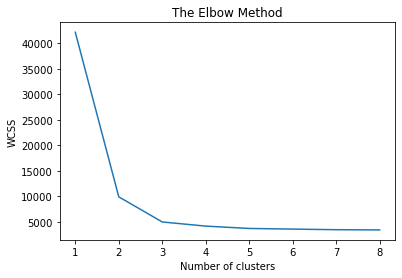

In [141]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_X)

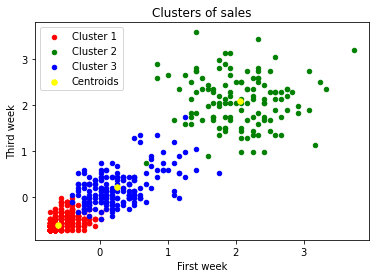

In [143]:
plt.scatter(scaled_X[y_kmeans == 0]['W0'], scaled_X[y_kmeans == 0]['W2'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_X[y_kmeans == 1]['W0'], scaled_X[y_kmeans == 1]['W2'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_X[y_kmeans == 2]['W0'], scaled_X[y_kmeans == 2]['W2'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()

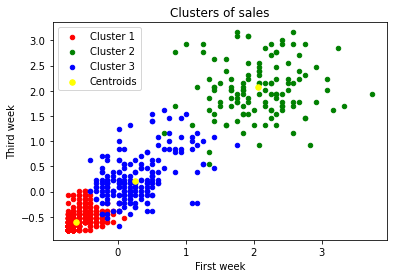

In [144]:
plt.scatter(scaled_X[y_kmeans == 0]['W0'], scaled_X[y_kmeans == 0]['W22'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_X[y_kmeans == 1]['W0'], scaled_X[y_kmeans == 1]['W22'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_X[y_kmeans == 2]['W0'], scaled_X[y_kmeans == 2]['W22'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()

# DBSCAN

In [173]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
Xdb = StandardScaler().fit_transform(X)
Xdb

array([[ 0.17391867,  0.22859969,  0.04681724, ..., -0.26477272,
        -0.36828257,  0.11630659],
       [-0.15776396, -0.2492208 , -0.49011498, ..., -0.72203567,
        -0.27291949, -0.93058184],
       [-0.15776396,  0.14896294, -0.10659197, ..., -0.08186755,
        -0.08219333, -0.19775994],
       ...,
       [-0.65528791, -0.72704129, -0.72022878, ..., -0.81348826,
        -0.46364565, -0.61651531],
       [-0.73820856, -0.72704129, -0.72022878, ..., -0.81348826,
        -0.65437181, -0.93058184],
       [-0.73820856, -0.64740454, -0.72022878, ..., -0.81348826,
        -0.84509797, -0.82589299]])

In [191]:
# To determine eps
range_eps=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range_eps:
    print ("eps values is: " + str(i))
    db = DBSCAN(eps=i, min_samples=2).fit(Xdb)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg= silhouette_score(Xdb,labels)
    print("EPS: "+str(i)+" Avgerage silhouette score:"+str(silhouette_avg))

eps values is: 0.1
{0, 1, 2, 3, -1}
EPS: 0.1 Avgerage silhouette score:-0.41009641082021664
eps values is: 0.2
{0, -1}
EPS: 0.2 Avgerage silhouette score:-0.23300221282540046
eps values is: 0.3
{0, -1}
EPS: 0.3 Avgerage silhouette score:-0.08242717214963192
eps values is: 0.4
{0, -1}
EPS: 0.4 Avgerage silhouette score:0.015661411952429878
eps values is: 0.5
{0, -1}
EPS: 0.5 Avgerage silhouette score:0.09871660383617564
eps values is: 0.6
{0, -1}
EPS: 0.6 Avgerage silhouette score:0.130409426813381
eps values is: 0.7
{0, -1}
EPS: 0.7 Avgerage silhouette score:0.16327143005224837
eps values is: 0.8
{0, -1}
EPS: 0.8 Avgerage silhouette score:0.20429770739042022
eps values is: 0.9
{0, -1}
EPS: 0.9 Avgerage silhouette score:0.2270269209031609


In [183]:
# To determine number of minimum sample
min_samples=[1,2,3,4,5,6,7,8,9,10]
for i in min_samples:
    print ("min_sample values is: " + str(i))
    db = DBSCAN(eps=0.8, min_samples=i).fit(Xdb)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    #ignore the label '-1' as its for the outliers 
    labels = db.labels_
    labels=set([label for label in db.labels_ if label >=0])
    print(set(labels))

    print ("min_sample: "+str(i)+" Total no of clusters:"+str(len(set(labels))))

min_sample values is: 1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

In [185]:
# DBSCAN implementation
db = DBSCAN(eps=0.2, min_samples=4).fit(Xdb)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [186]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xdb, labels))

Estimated number of clusters: 1
Estimated number of noise points: 727
Silhouette Coefficient: -0.233


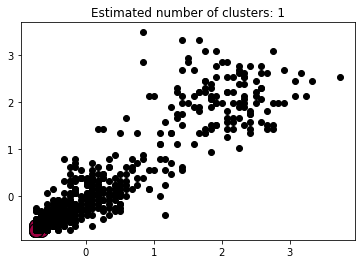

In [187]:
# Visulization
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Xdb[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Xdb[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# AGNES

In [197]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

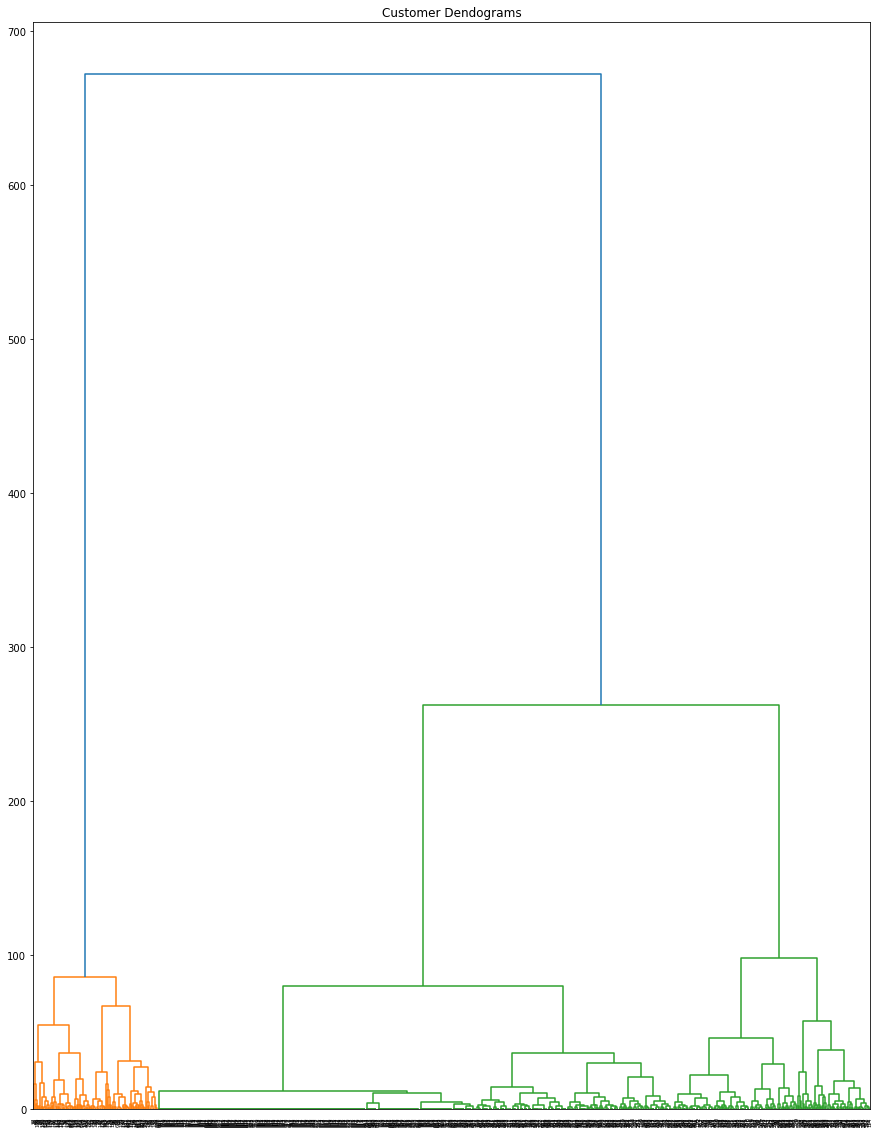

In [200]:
data = X.iloc[:, 3:5].values

plt.figure(figsize=(15, 20))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [201]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

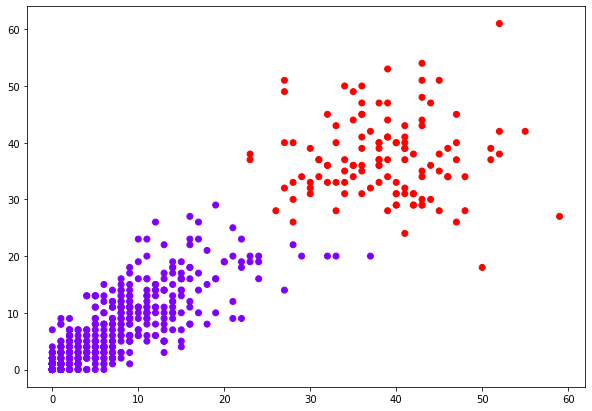

In [202]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')